[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Fisher_1991/fig_2.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Fisher_1991/fig_2.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Fisher_1991/fig_2.ipynb)

# based on Fig 2. in [Fisher 1991](https://doi.org/10.1034/j.1600-0889.1991.t01-4-00006.x)
Deuterium excess $d=\delta(D) - 8\delta( ^18O)$

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot

from PySDM import Formulae
from PySDM.physics import si


In [25]:
formulae={}
for paper in ["BolotEtAl2013", "JouzelAndMerlivat1984"]:
    formulae[paper] = Formulae(
        isotope_meteoric_water_line="Dansgaard1964",
        isotope_diffusivity_ratios="Stewart1975",
        isotope_equilibrium_fractionation_factors="VanHook1968",
        isotope_kinetic_fractionation_factors=paper
    )

In [26]:
temperature = np.linspace(223.15, 273.15, 10) * si.K
saturation = 1.1

alpha_kin_bolot_without_s_eff = formulae["BolotEtAl2013"].isotope_kinetic_fractionation_factors.alpha_kinetic(
    alpha_equilibrium=formulae["BolotEtAl2013"].isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature),
    heavy_to_light_diffusivity_ratio=formulae["BolotEtAl2013"].isotope_diffusivity_ratios.ratio_2H(temperature),
    heavy_to_light_ventilation_ratio=1.0,
    effective_supersaturation=saturation,
)
alpha_kin_jouzel_merlivat = formulae["JouzelAndMerlivat1984"].isotope_kinetic_fractionation_factors.alpha_kinetic(
    alpha_equilibrium=formulae["JouzelAndMerlivat1984"].isotope_equilibrium_fractionation_factors.alpha_l_2H(temperature),
    heavy_to_light_diffusivity_ratio=formulae["JouzelAndMerlivat1984"].isotope_diffusivity_ratios.ratio_2H(temperature),
    relative_humidity=saturation,
)


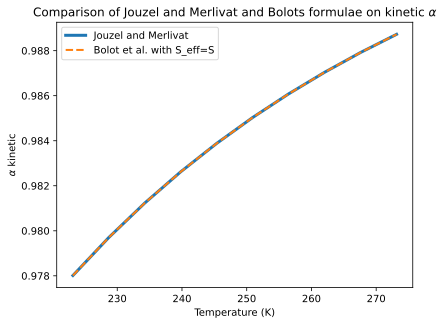

In [49]:
fig, ax = plt.subplots()
ax.plot(temperature, alpha_kin_jouzel_merlivat, '', linewidth=3, label="Jouzel and Merlivat")
ax.plot(temperature, alpha_kin_bolot_without_s_eff, '--', linewidth=2, label="Bolot et al. with S_eff=S")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel(r"$\alpha$ kinetic")
ax.set_title("Comparison of Jouzel and Merlivat and Bolots formulae on kinetic $\\alpha$")
ax.legend()
show_plot("alpha_kinetic")